# Jupyter Notebook Title

## Contents of Notebook
Description of contents:

Examples of display of spatial display using GeoPandas

Author: Don Cameron

Contact: donrcameron@gmail.com, +61 (0) 413208746

### Notebook magic commands

In [1]:
%matplotlib inline


### Notebook imports

In [2]:
# all imports should go here

import pandas as pd
import sys
import os
import subprocess
import datetime
import platform
import datetime

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np



### Notebook version status

In [3]:
theNotebook = '2018-07-20-dc-GeoPandasSpatialDisplayNotebook'

In [4]:
%%javascript
var kernel = IPython.notebook.kernel;
var thename = window.document.getElementById("notebook_name").innerHTML;
var command = "theNotebook = " + "'"+thename+"'";
kernel.execute(command);

<IPython.core.display.Javascript object>

In [5]:
# show info to support reproducability

def python_env_name():
    envs = subprocess.check_output('conda env list').splitlines()
    # get unicode version of binary subprocess output
    envu = [x.decode('ascii') for x in envs]
    active_env = list(filter(lambda s: '*' in str(s), envu))[0]
    env_name = str(active_env).split()[0]
    return env_name
#end python_env_name

print('python version : ' + sys.version)
print('python environment :', python_env_name())
print('pandas version : ' + pd.__version__)
print('geopandas version: ', gpd.__version__)


print('current wkg dir: ' + os.getcwd())
print('Notebook name: ' + theNotebook)
print('Notebook run at: ' + str(datetime.datetime.now())+ ' local time')
print('Notebook run at: ' + str(datetime.datetime.utcnow()) + ' UTC') 
print('Notebook run on: ' + platform.platform())


python version : 3.6.3 | packaged by conda-forge | (default, Nov  4 2017, 10:10:42) [MSC v.1900 64 bit (AMD64)]
python environment : root36
pandas version : 0.22.0
geopandas version:  0.4.0
current wkg dir: C:\Users\donrc\Documents\JupyterNotebooks\GeoPandasSpatialDisplayNotebookProjectNotebookProject\develop
Notebook name: 2018-07-20-dc-GeoPandasSpatialDisplayNotebook
Notebook run at: 2018-07-22 19:02:45.273098 local time
Notebook run at: 2018-07-22 09:02:45.273098 UTC
Notebook run on: Windows-10-10.0.17134-SP0


---------------------------
## Draw map using Cartopy

The various methods supported by Cartopy (stock images, gridlines, etc) all automatically conform to the selected Projection.

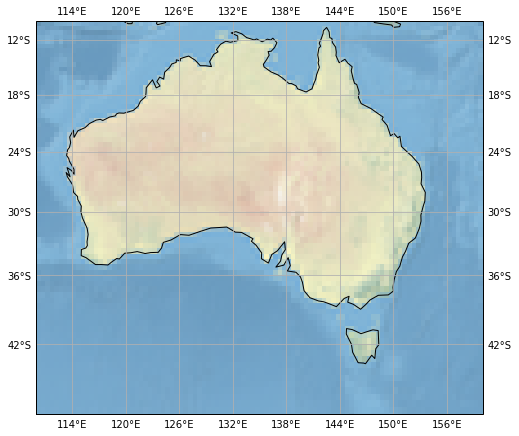

In [6]:


fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Mercator())

# make the map global rather than have it zoom in to
# the extents of any plotted data
ax.set_extent([110, 160, -45, -10])

ax.stock_img()
ax.coastlines()

gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree() )
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

plt.show()

## Display of Spatial Data
We use a GeoPandas data set to plot the centroid of each country, and draw the bounding box for Australia.

We do all this using the PlateCarree projection, which is also the native projection of the GeoPandas data (ie lat, lons)

In [7]:
path = gpd.datasets.available


In [8]:
path

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

{'init': 'epsg:4326'}


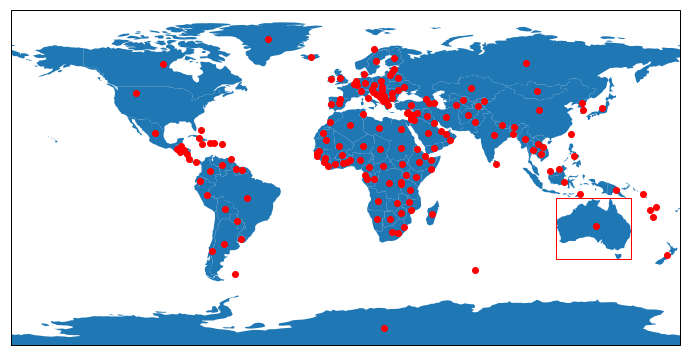

In [9]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

path=gpd.datasets.get_path('naturalearth_lowres')

world = gpd.read_file(path)
print(world.crs)

box_oz = world[world['name']=='Australia'].copy().envelope

world.plot(ax=ax)
box_oz.plot(ax=ax, edgecolor='red', facecolor='none')
world.centroid.plot(ax=ax, color='red')

plt.show()


### Using a different projection

If we want to use a different projection, we must convert the coordinates for the geometry in the original
GeoPandas dataframe to the coordinates.  

However, the bounding box, when converted and plotted, now intersects Australia

{'init': 'epsg:4326'}


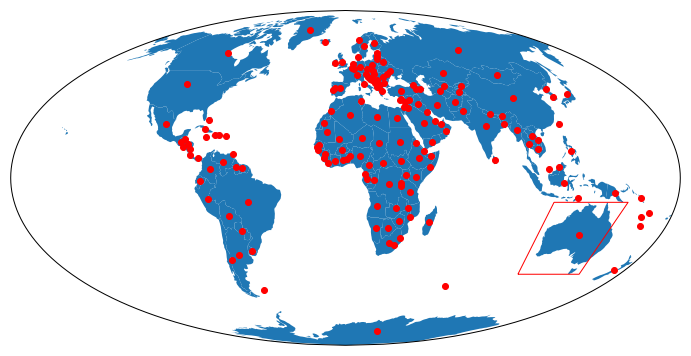

In [10]:
fig = plt.figure(figsize=(12, 12))

mol = ccrs.Mollweide()
ax = fig.add_subplot(1, 1, 1, projection=mol)

path=gpd.datasets.get_path('naturalearth_lowres')

world = gpd.read_file(path)
print(world.crs)

world_mol = world.to_crs(mol.proj4_init)

box_oz = world[world['name']=='Australia'].copy().envelope
box_oz_mol = box_oz.to_crs(mol.proj4_init)

world_mol.plot(ax=ax)
box_oz_mol.plot(ax=ax, edgecolor='red', facecolor='none',  )
world_mol.centroid.plot(ax=ax, color='red')

plt.show()


List the lat, lon coordinates of the bounding box

In [11]:
[print(list(t.coords)) for t in box_oz.exterior]


[(113.3389530782625, -43.634597263362096), (153.5694690289442, -43.634597263362096), (153.5694690289442, -10.668185723516643), (113.3389530782625, -10.668185723516643), (113.3389530782625, -43.634597263362096)]


[None]

In [12]:
for t in box_oz.exterior:
    corners = list(t.coords)
    c_x = [xy[0] for xy in corners]
    c_y = [xy[1] for xy in corners]
#end for


{'init': 'epsg:4326'}


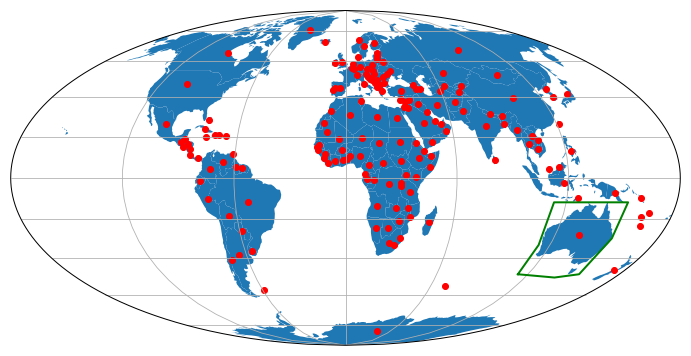

In [13]:
fig = plt.figure(figsize=(12, 12))

# specify a non-PlateCarree projection for map Axes
mol = ccrs.Mollweide()
ax = fig.add_subplot(1, 1, 1, projection=mol)

# read the datset we wish to display
path=gpd.datasets.get_path('naturalearth_lowres')

world = gpd.read_file(path)
print(world.crs)

# get the lat, lons of the Australia bounding box
box_oz = world[world['name']=='Australia'].copy().envelope
for t in box_oz.exterior:
    corners = list(t.coords)
    c_x = [xy[0] for xy in corners]
    c_y = [xy[1] for xy in corners]
#end for

# convert the dataset to the Projection we have chosen
world_mol = world.to_crs(mol.proj4_init)

# plot the dataset, using GeoPandas plot command
world_mol.plot(ax=ax)

# Plot the bounding box, asking Matplotlib / Cartopy to use Great Circles for the bounding box lines
plt.plot(c_x, c_y,  linewidth=2, transform=ccrs.Geodetic() , color='green')
world_mol.centroid.plot(ax=ax, color='red')

plt.show()

Show coordinates after transforming to new Projection

In [15]:
world.head()


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [16]:
world_mol.head(4)

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((5393644.259924081 4297624.164644449,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((1630977.522735781 -726230.556386607...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((1718202.65969354 4995714.638699916, ..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((4882502.197701101 2963365.309760125,..."


-----------------------------------
## Display Graphic at Spatial Coordinates

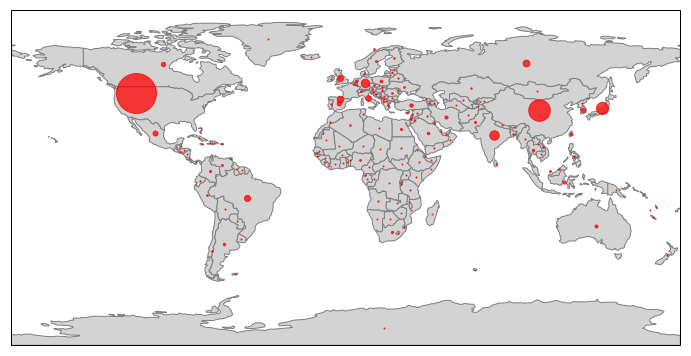

In [17]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

path=gpd.datasets.get_path('naturalearth_lowres')

world = gpd.read_file(path)
gdp_max = world['gdp_md_est'].max()
gdp_min = world['gdp_md_est'].min()

world.plot(ax=ax, facecolor='lightgrey', edgecolor='grey', )

max_size = 40
min_size = 1
    
#world.centroid.plot(ax=ax, color='red')
for (idx, country), cd in zip(world.iterrows(), world.centroid):
    
    gdp = country['gdp_md_est']
    plt.plot(cd.xy[0], cd.xy[1], 
             marker='o', 
             color='red', 
             markersize=min_size+(max_size-min_size)*(gdp/gdp_max), 
             transform=ccrs.Geodetic(),
            alpha=0.75,
            )

#end for
plt.show()

We select a different Projection for the map

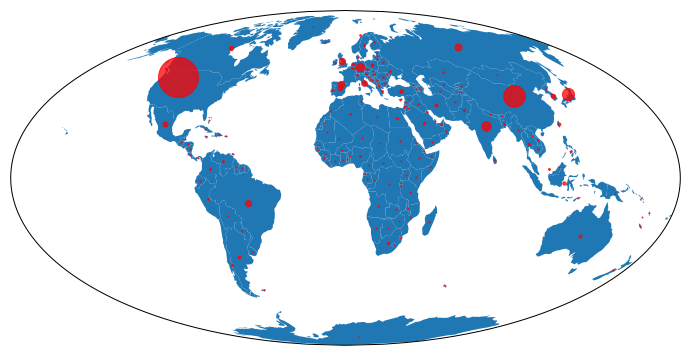

In [14]:
fig = plt.figure(figsize=(12, 12))

# specify a non-PlateCarree projection for map Axes
mol = ccrs.Mollweide()
ax = fig.add_subplot(1, 1, 1, projection=mol)

# read the datset we wish to display
path=gpd.datasets.get_path('naturalearth_lowres')

world = gpd.read_file(path)
gdp_max = world['gdp_md_est'].max()
gdp_min = world['gdp_md_est'].min()

# convert the dataset to the Projection we have chosen
world_mol = world.to_crs(mol.proj4_init)

# plot the dataset, using GeoPandas plot command
world_mol.plot(ax=ax)

# set range of marker size
max_size = 40
min_size = 1
for (idx, country), cd in zip(world.iterrows(), world.centroid):
    gdp = country['gdp_md_est']
    plt.plot(cd.xy[0], cd.xy[1], 
             marker='o', 
             color='red', 
             markersize=min_size+(max_size-min_size)*(gdp/gdp_max), 
             transform=ccrs.Geodetic(),
            alpha=0.75,
            )

#end for


plt.show()

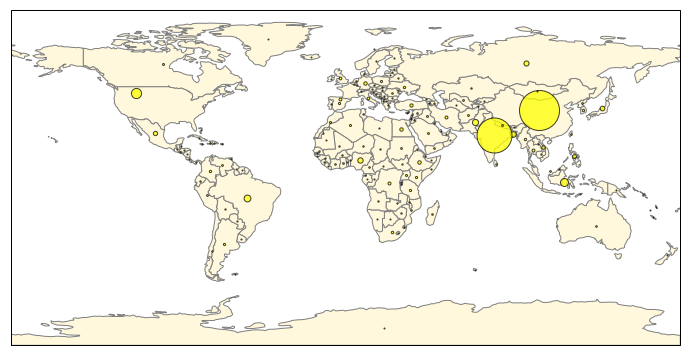

In [18]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

path=gpd.datasets.get_path('naturalearth_lowres')

world = gpd.read_file(path)
gdp_max = world['gdp_md_est'].max()
gdp_min = world['gdp_md_est'].min()

pop_max = world['pop_est'].max()
pop_min = world['pop_est'].min()

world.plot(ax=ax, facecolor='cornsilk', edgecolor='grey')

max_size = 40
min_size = 1
    
#world.centroid.plot(ax=ax, color='red')
for (idx, country), cd in zip(world.iterrows(), world.centroid):
    
    pop = country['pop_est']
    plt.plot(cd.xy[0], cd.xy[1], 
             marker='o',
             markeredgecolor='black',
             color='Yellow', 
             markersize=min_size+(max_size-min_size)*(pop/pop_max), 
             transform=ccrs.Geodetic(),
            alpha=0.75,
            )

#end for
plt.show()

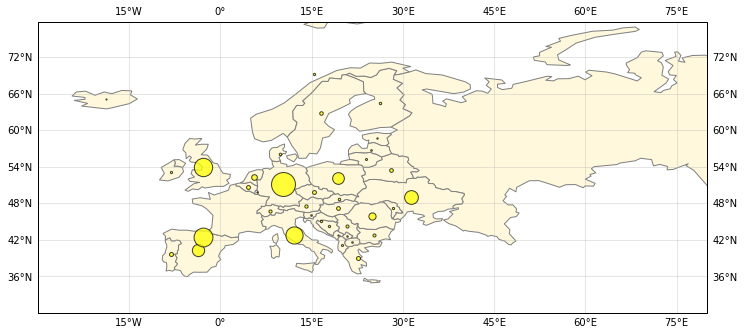

In [19]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

ax.set_extent([-30, 80, 30, 70 ])

path=gpd.datasets.get_path('naturalearth_lowres')

world = gpd.read_file(path)
world = world[world['continent']=='Europe'].copy()

gdp_max = world['gdp_md_est'].max()
gdp_min = world['gdp_md_est'].min()

pop_max = world['pop_est'].max()
pop_min = world['pop_est'].min()

world.plot(ax=ax, facecolor='cornsilk', edgecolor='grey')

max_size = 40
min_size = 1
    
#world.centroid.plot(ax=ax, color='red')
for (idx, country), cd in zip(world.iterrows(), world.centroid):
    
    pop = country['pop_est']
    plt.plot(cd.xy[0], cd.xy[1], 
             marker='o',
             markeredgecolor='black',
             color='Yellow', 
             markersize=min_size+(max_size-min_size)*(pop/pop_max), 
             transform=ccrs.Geodetic(),
            alpha=0.75,
            )

#end for
gl = ax.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), alpha=0.4 )
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


plt.show()

----------------------------
## Using Geopandas shading and discrete markers

Note that Geopandas (by default) will use the whole vertical extent of the figure
to draw the colorbar.  We manually adjust this to make it the same height as the map.

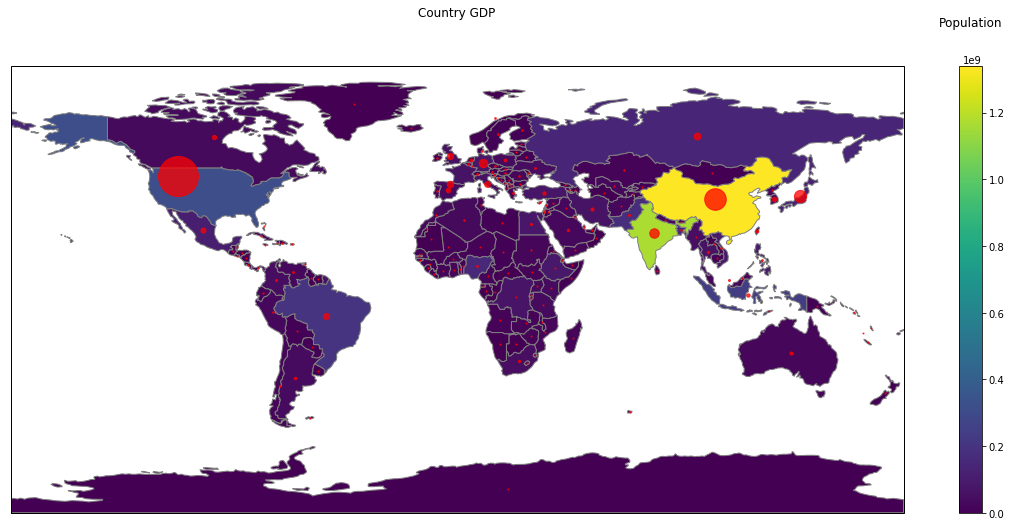

In [18]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

path=gpd.datasets.get_path('naturalearth_lowres')

world = gpd.read_file(path)
gdp_max = world['gdp_md_est'].max()
gdp_min = world['gdp_md_est'].min()

p = world.plot(ax=ax, facecolor='lightgrey', edgecolor='grey', column='pop_est', 
           legend=True,
          )

max_size = 40
min_size = 1
    
#world.centroid.plot(ax=ax, color='red')
for (idx, country), cd in zip(world.iterrows(), world.centroid):
    
    gdp = country['gdp_md_est']
    plt.plot(cd.xy[0], cd.xy[1], 
             marker='o', 
             color='red', 
             markersize=min_size+(max_size-min_size)*(gdp/gdp_max), 
             transform=ccrs.Geodetic(),
            alpha=0.75,
            )

#end for

map_ax = fig.axes[0]
leg_ax = fig.axes[1]

map_box = map_ax.get_position()
leg_box = leg_ax.get_position()

leg_ax.set_position([leg_box.x0, map_box.y0, leg_box.width, map_box.height])

leg_ax.set_title('Population', pad=40)
map_ax.set_title('Country GDP', pad=50)

plt.show()

[<cartopy.mpl.geoaxes.GeoAxesSubplot object at 0x000001D3001C8F60>, <matplotlib.axes._subplots.AxesSubplot object at 0x000001D30076BAC8>]
0.125 0.3475 0.6200000000000001 0.31
0.7837500000000002 0.1250000000000001 0.03774999999999995 0.7549999999999999
after shrink
0.125 0.3475 0.6200000000000001 0.31
0.7837500000000002 0.3475 0.03774999999999995 0.302


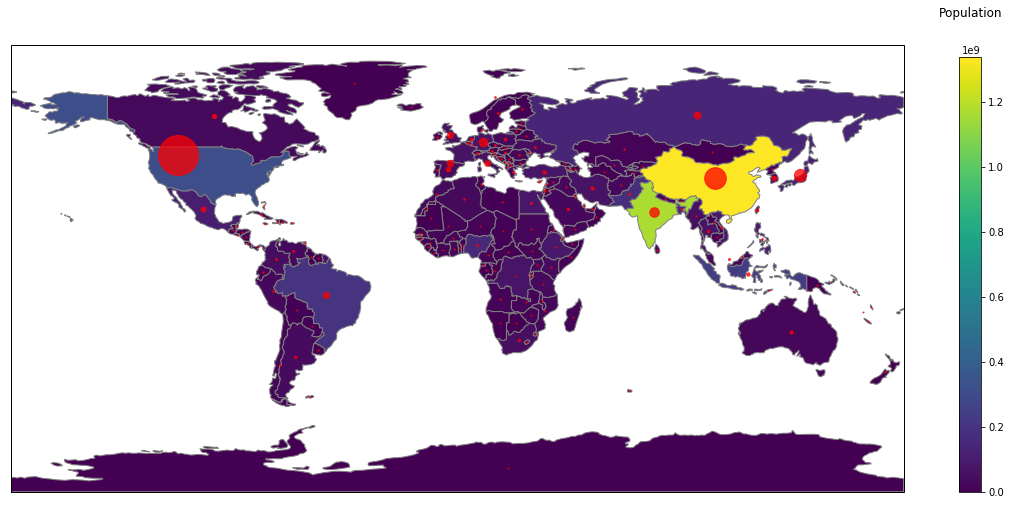

In [24]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

path=gpd.datasets.get_path('naturalearth_lowres')

world = gpd.read_file(path)
gdp_max = world['gdp_md_est'].max()
gdp_min = world['gdp_md_est'].min()

p = world.plot(ax=ax, facecolor='lightgrey', edgecolor='grey', column='pop_est', 
           legend=True,
          )

max_size = 40
min_size = 1
    
#world.centroid.plot(ax=ax, color='red')
for (idx, country), cd in zip(world.iterrows(), world.centroid):
    
    gdp = country['gdp_md_est']
    plt.plot(cd.xy[0], cd.xy[1], 
             marker='o', 
             color='red', 
             markersize=min_size+(max_size-min_size)*(gdp/gdp_max), 
             transform=ccrs.Geodetic(),
            alpha=0.75,
            )

#end for

print(fig.axes)

for a in fig.axes:
    box=a.get_position()
    print(box.x0, box.y0, box.width, box.height)
#end for 

map_ax = fig.axes[0]
leg_ax = fig.axes[1]

map_box = map_ax.get_position()
leg_box = leg_ax.get_position()

leg_scale = 0.4
leg_ax.set_position([leg_box.x0, map_box.y0, box.width, box.height*leg_scale])

print('after shrink')
for a in fig.axes:
    box=a.get_position()
    print(box.x0, box.y0, box.width, box.height)
#end for 

leg_ax.set_title('Population', pad=40)

plt.show()

-------------------------
## GeoPandas continuous variable display

Note the oversize colorbar!

0.125 0.125 0.775 0.755
after gpd
0.125 0.3475 0.6200000000000001 0.31
0.7837500000000002 0.1250000000000001 0.03774999999999995 0.7549999999999999


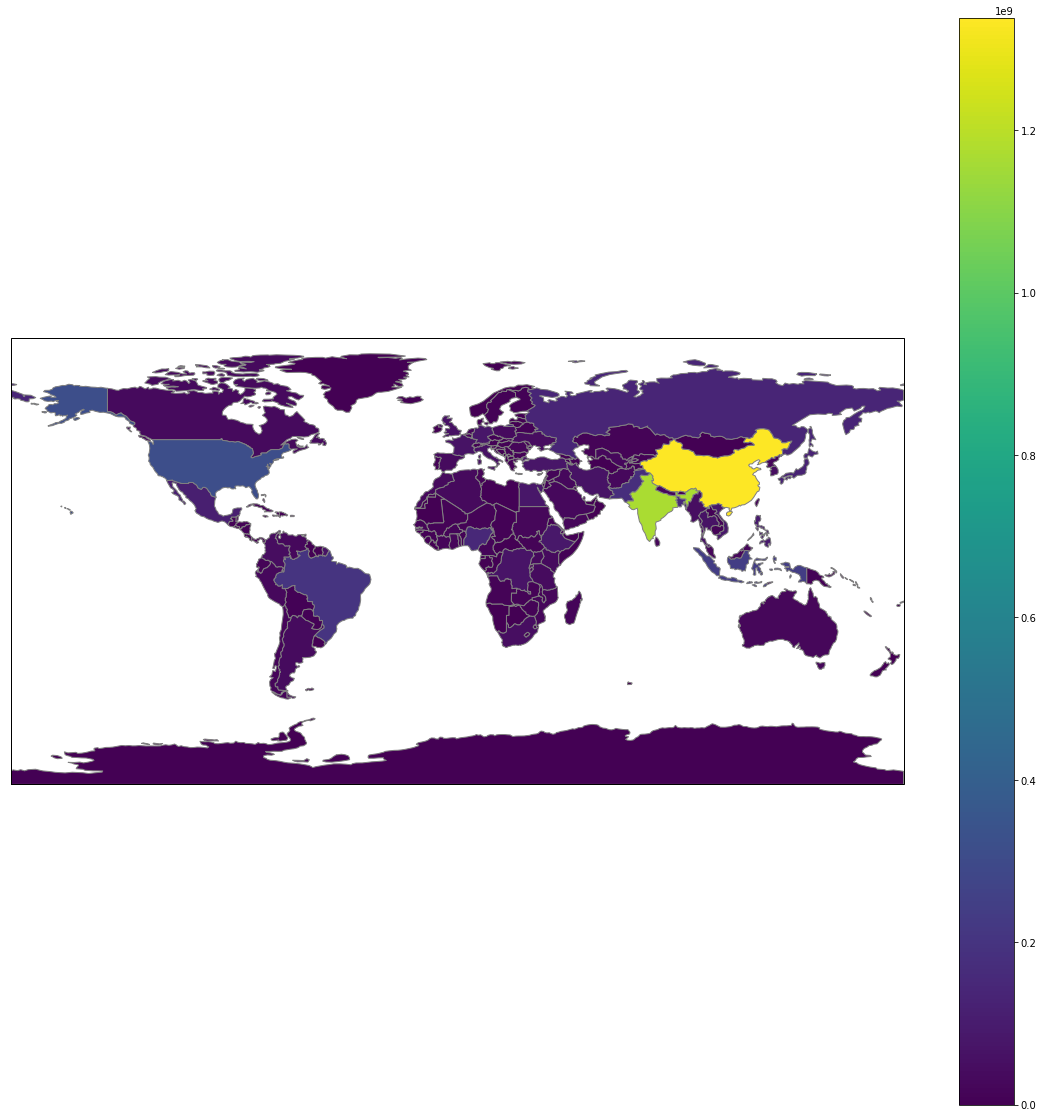

In [21]:
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')


path=gpd.datasets.get_path('naturalearth_lowres')

for a in fig.axes:
    box=a.get_position()
    print(box.x0, box.y0, box.width, box.height)
#end for 
world = gpd.read_file(path)
gdp_max = world['gdp_md_est'].max()
gdp_min = world['gdp_md_est'].min()

p = world.plot(ax=ax, facecolor='lightgrey', edgecolor='grey', column='pop_est', 
           legend=True,
          )
print('after gpd')
for a in fig.axes:
    box=a.get_position()
    print(box.x0, box.y0, box.width, box.height)
#end for 

plt.show()

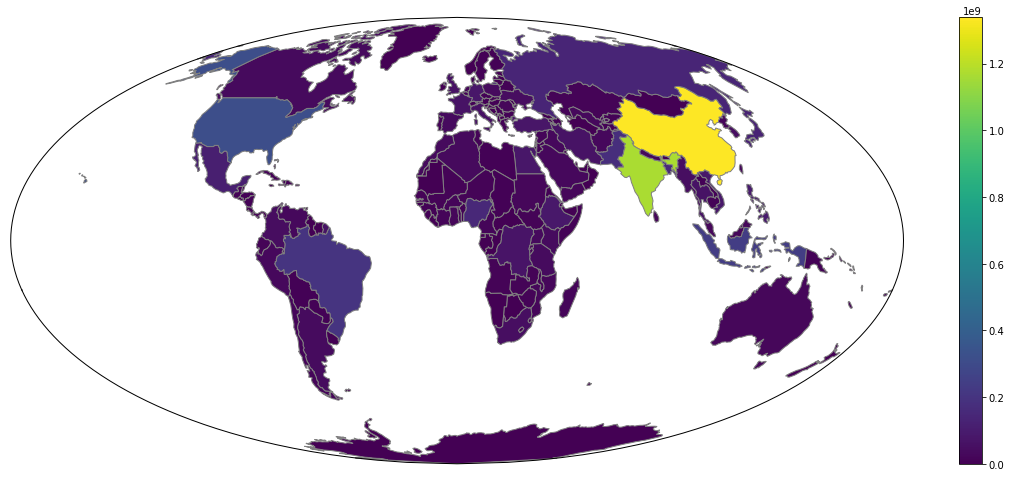

In [20]:
fig = plt.figure(figsize=(20, 20))

mol = ccrs.Mollweide()
ax = fig.add_subplot(1, 1, 1, projection=mol)
# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')


path=gpd.datasets.get_path('naturalearth_lowres')


world = gpd.read_file(path)
# convert the dataset to the Projection we have chosen
world_mol = world.to_crs(mol.proj4_init)

# plot the dataset, using GeoPandas plot command
world_mol.plot(ax=ax, facecolor='lightgrey', edgecolor='grey', column='pop_est', 
           legend=True,
          )

map_ax = fig.axes[0]
leg_ax = fig.axes[1]

map_box = map_ax.get_position()
leg_box = leg_ax.get_position()

leg_ax.set_position([leg_box.x0, map_box.y0, leg_box.width, map_box.height])

plt.show()

0.125 0.125 0.775 0.755
after gpd
0.125 0.1286806229166667 0.6200000000000001 0.7476387541666666
0.7837500000000002 0.1250000000000001 0.015100000000000002 0.7549999999999999


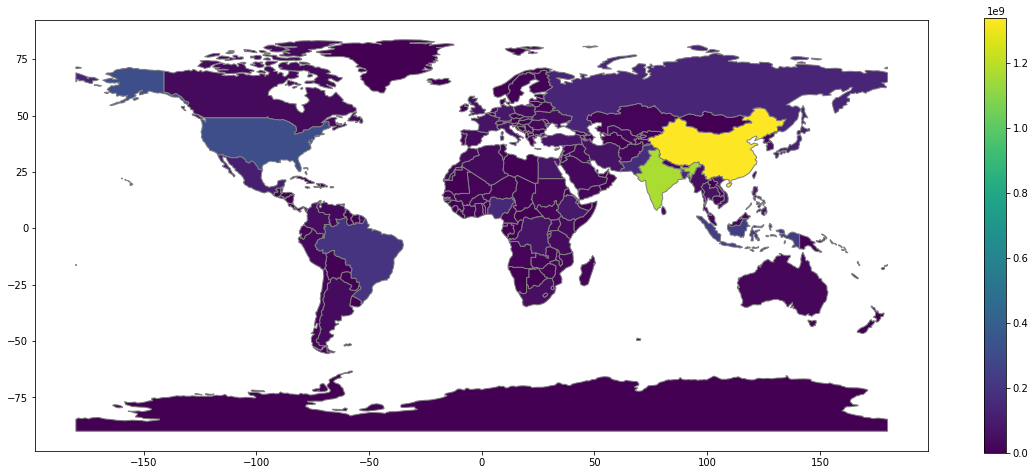

In [11]:
fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 1, 1, )
# set aspect to equal. This is done automatically
# when using *geopandas* plot on it's own, but not when
# working with pyplot directly.
ax.set_aspect('equal')

path=gpd.datasets.get_path('naturalearth_lowres')

for a in fig.axes:
    box=a.get_position()
    print(box.x0, box.y0, box.width, box.height)
#end for 
world = gpd.read_file(path)
gdp_max = world['gdp_md_est'].max()
gdp_min = world['gdp_md_est'].min()

p = world.plot(ax=ax, facecolor='lightgrey', edgecolor='grey', column='pop_est', 
           legend=True,
          )
print('after gpd')
for a in fig.axes:
    box=a.get_position()
    print(box.x0, box.y0, box.width, box.height)
#end for 

plt.show()

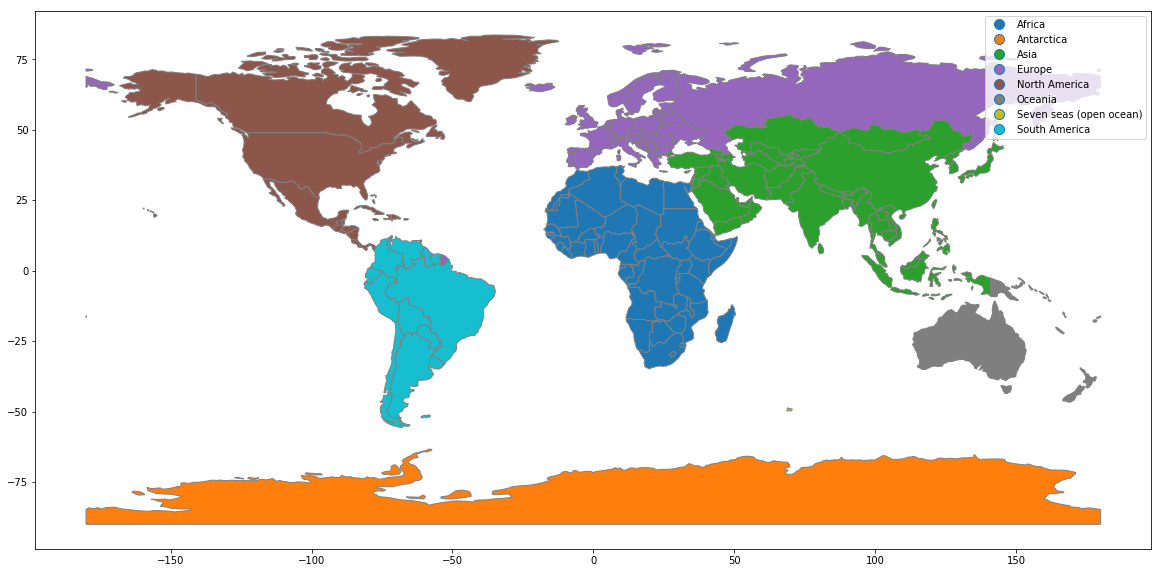

In [27]:
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_aspect('equal')
p = world.plot(ax=ax, facecolor='lightgrey', edgecolor='grey', column='continent', 
           legend=True,
          )
plt.show()

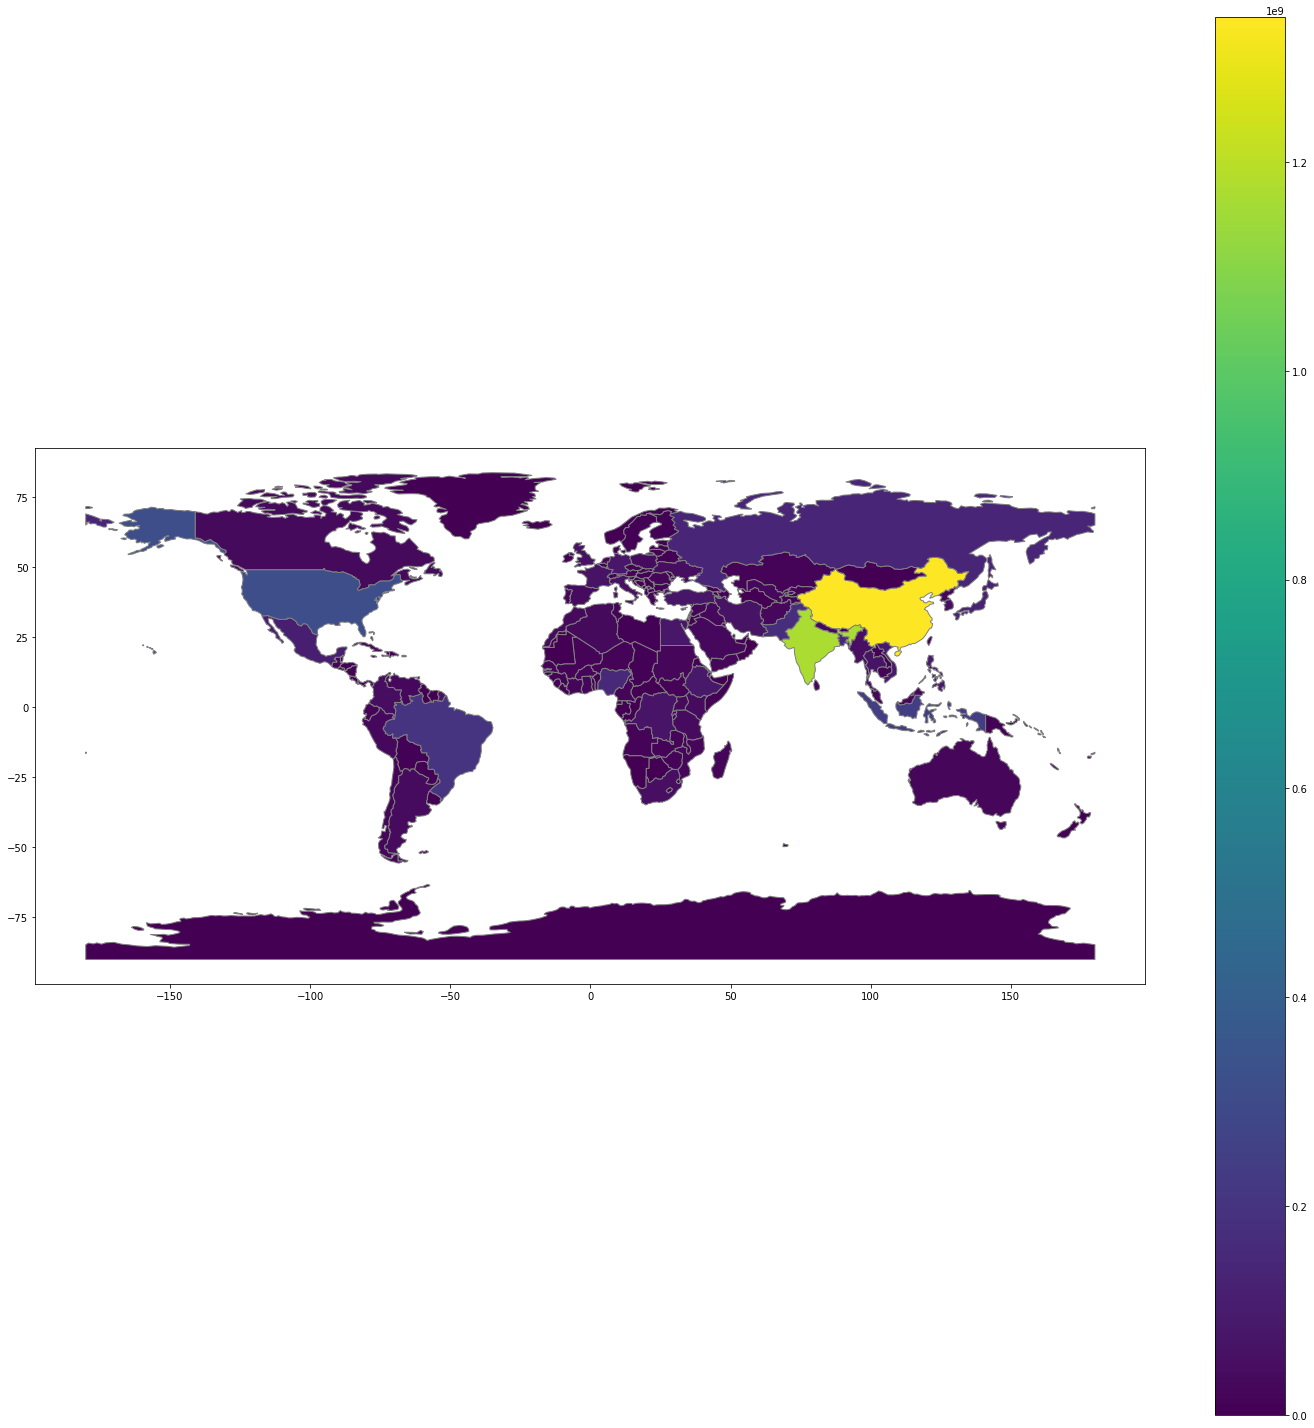

In [12]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.tight_layout()
ax.set_aspect('equal')
p = world.plot(ax=ax, facecolor='lightgrey', edgecolor='grey', column='pop_est', 
           legend=True,
          )
plt.show()

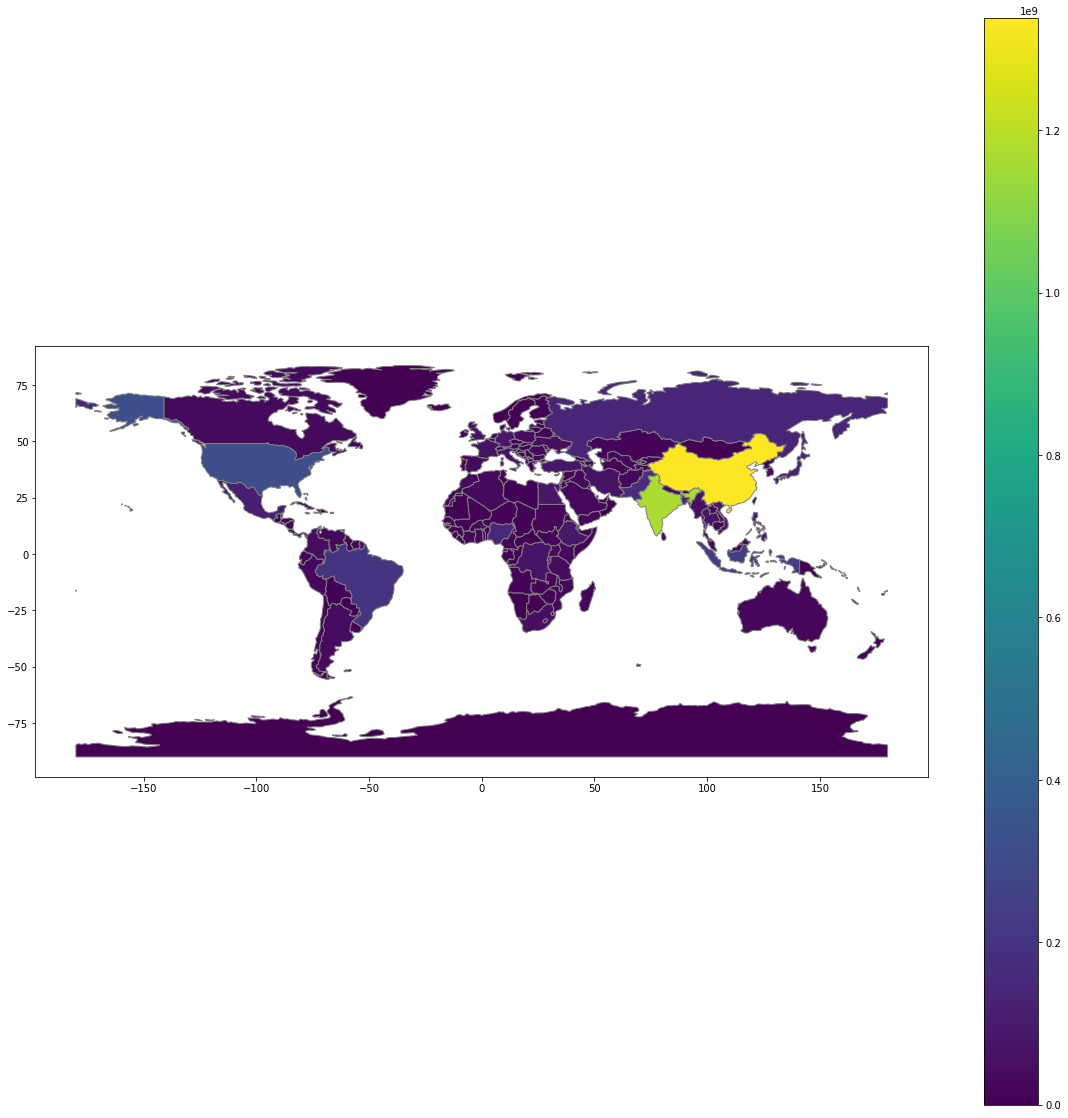

In [29]:
fig, ax = plt.subplots(figsize=(20, 20))
#ax.set_aspect('equal')
p = world.plot(ax=ax, facecolor='lightgrey', edgecolor='grey', column='pop_est', 
           legend=True,
          )
plt.show()

In [155]:
print(box.x0, box.y0, box.width, box.height)

0.7837500000000002 0.1250000000000001 0.03774999999999995 0.7549999999999999


In [91]:
print(world.centroid[0].xy[0])

array('d', [66.08669022192834])


In [92]:
world['gdp_md_est'].max()

15094000.0

In [107]:
for (idx, c), cd in zip(world.iterrows(), world.centroid):
    print(c['name'], cd.xy[0], cd.xy[1])
    break
    
    

Afghanistan array('d', [66.08669022192834]) array('d', [33.85639928169076])


In [103]:
len(world.centroid)

177

### Customizations for notebook

In [9]:
# path to saved figures
FIGURE_PREFIX = '../figures/'

### Required notebooks to be run first

In [5]:
from IPython.display import FileLink
FileLink('../develop/a.ipynb')

C:\Users\donrc\Documents\JupyterNotebooks\TemplateNotebookProject\develop\a.ipynb

### Display associated webpages (eg source of data)

In [6]:
from IPython.display import IFrame
IFrame("http://www.net-analysis.com", width = 800, height = 200)

### Save figures to figures directory

../figures/Test20170218-193200.jpg saved.


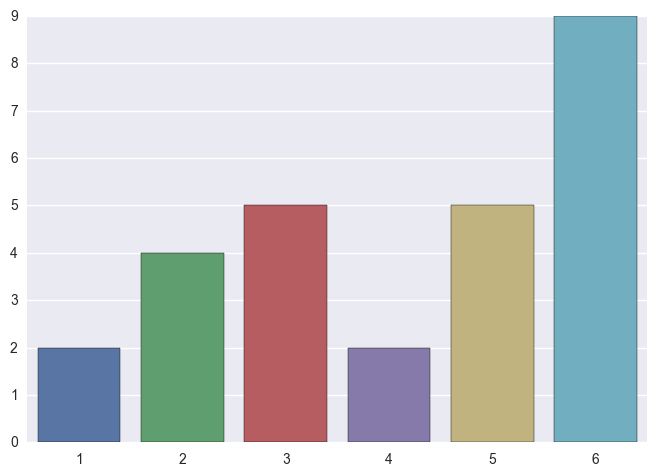

In [16]:
def save_figure(figure_title='TemplateNotebookFigure', figure_prefix='../figures/'):
    """
     save_figure:  same the current matplotlib.pyplot figure as a jpg file

     a file is generated from the supplied title, and the date and time

     Inputs:
     figure_title: string, incorporated into file name
     figure_prefix: string giving relative (or absolute) path the save location
     Returns:
     True is save OK
     False otherwise

     Outputs:
     prints error messages on exceptions

    """

    try:
        fname     = figure_prefix+figure_title+datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'.jpg'
        plt.savefig(fname)
        print(fname+' saved.')
    except IOError as err:
        print('Unable to save figure - IO Error!')
        print("IO error: {0}".format(err))
    except OSError as err:
        print('Unable to save figure - OS Error!')
        print("OS error: {0}".format(err))
    except:
        print('Unable to save figure - Unexpected Error!')
        print("Unexpected error:", sys.exc_info()[0])
        raise
    #end try
#end save_figure

x         =[1,2,3,4,5,6]
y         =[2,4,5,2,5,9]
plot2     = sns.barplot(x=x, y=y)

save_figure(figure_title='Test', figure_prefix=FIGURE_PREFIX)

plt.show()

### Display images

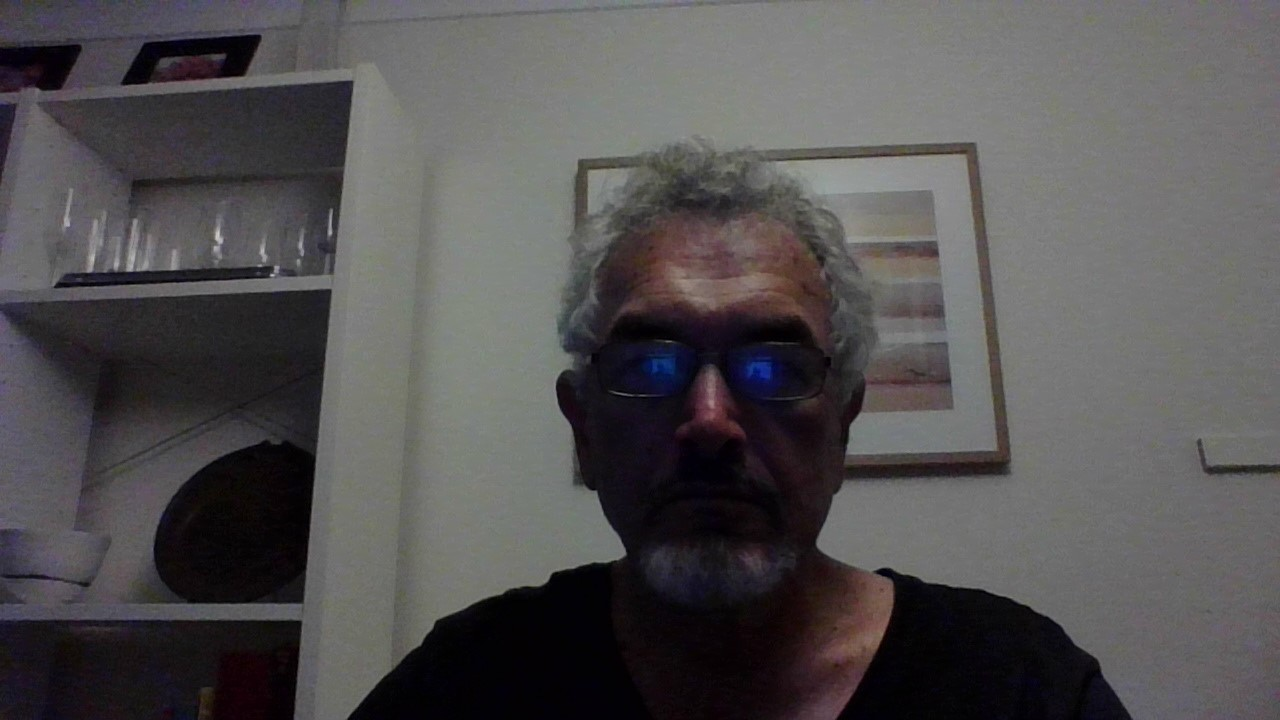

In [8]:
from IPython.display import Image
Image(filename='../figures/apc.jpg', height = 100, width = 200)

## Conclusions / Summary